In [0]:
from IPython.display import Image

# **course_3_project**

 **Part:1**

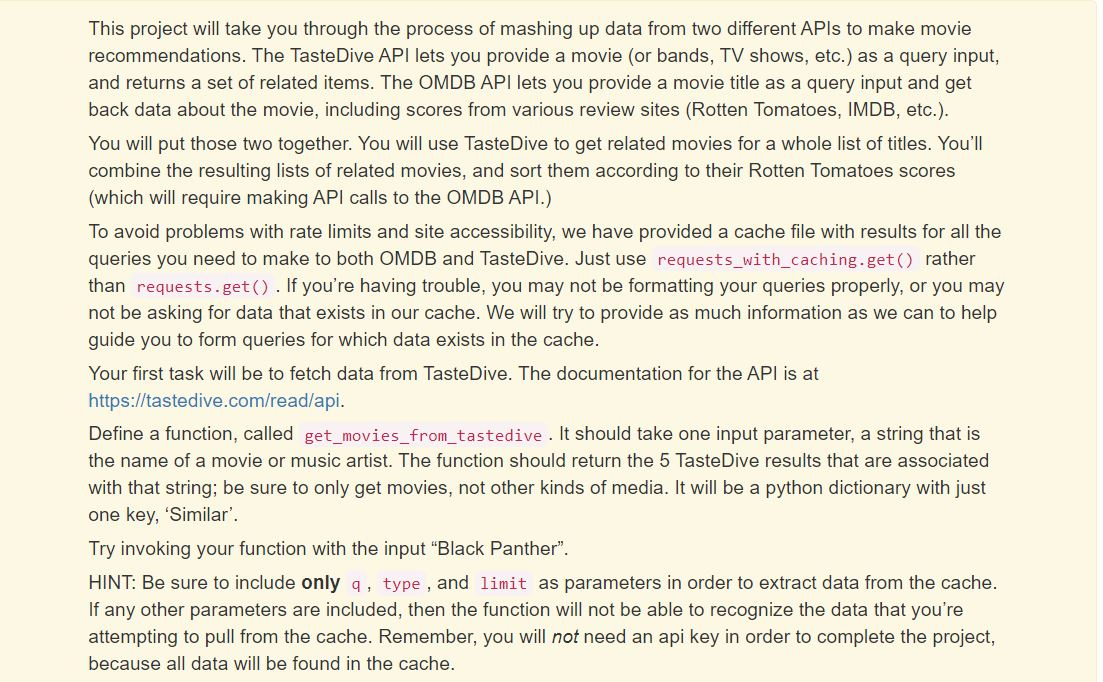

In [3]:
Image('pro1.JPG',width=1000)

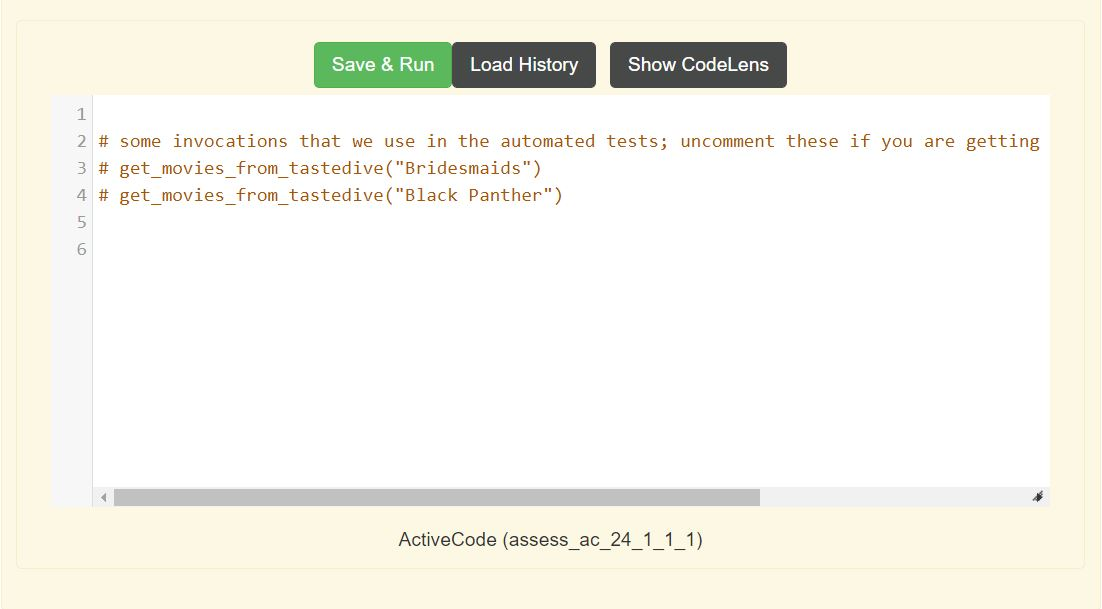

In [4]:
Image('pro2.JPG',width=1000)

In [0]:
import requests_with_caching
import json
def get_movies_from_tastedive(string):
    base_url="https://tastedive.com/api/similar"
    params_diction = {}
    params_diction['q']=string
    params_diction['type']='movies'
    params_diction['limit']=5
    tastedive_response = requests_with_caching.get(base_url, params = params_diction)
    print(tastedive_response.url)
    return tastedive_response.json()
    

**Part:2**

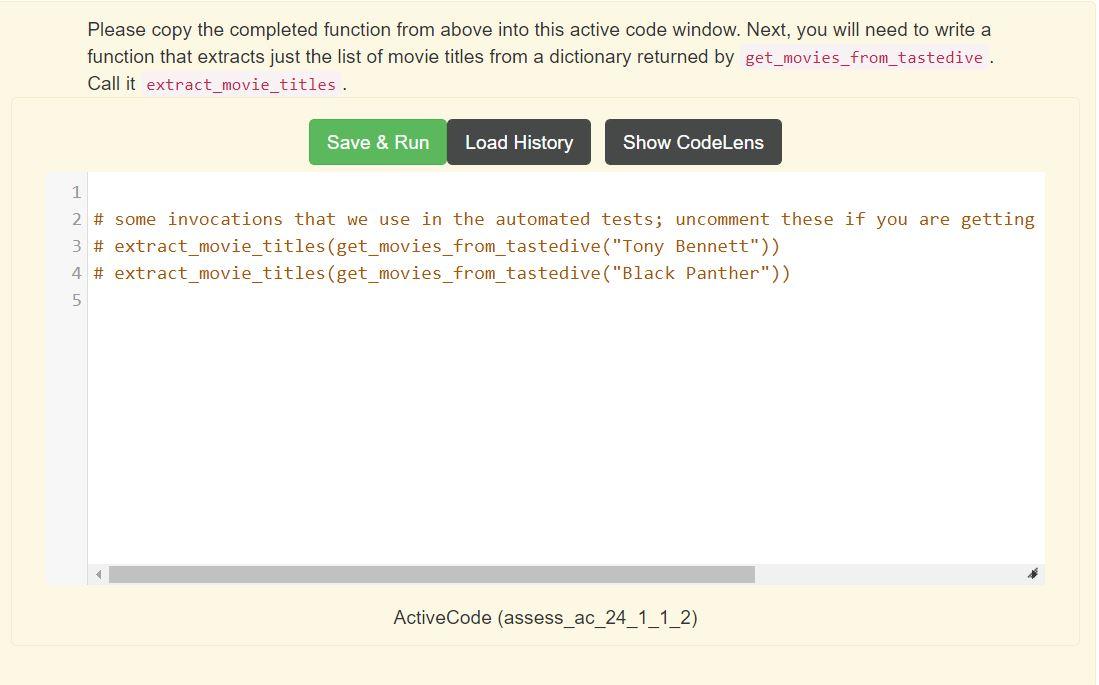

In [5]:
Image('pro3.JPG',width=1000)

In [0]:
import requests_with_caching
import json
def get_movies_from_tastedive(string):
    base_url="https://tastedive.com/api/similar"
    params_diction = {}
    params_diction['q']=string
    params_diction['type']='movies'
    params_diction['limit']=5
    tastedive_response = requests_with_caching.get(base_url, params = params_diction)
    #print(tastedive_response.url)
    return tastedive_response.json()

def extract_movie_titles(result):
    dic=result['Similar']
    l=len(dic['Results'])
    li=[]
    for i in range(l):
        li.append(dic['Results'][i]['Name'])
    return li
 


**Part:3**

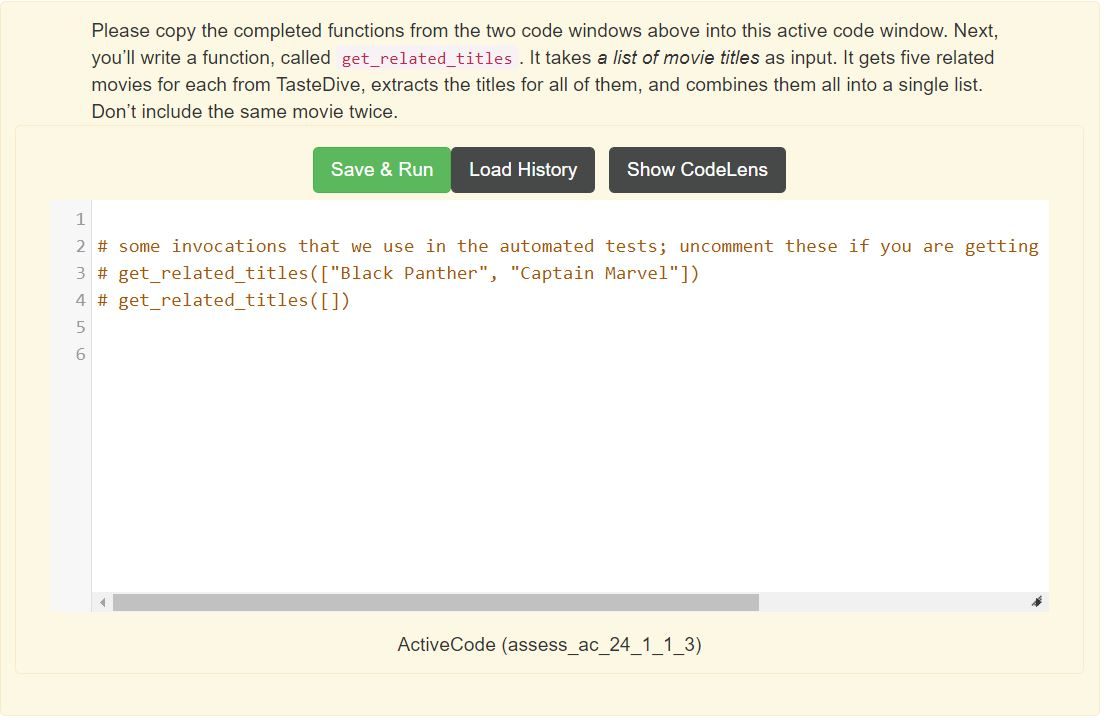

In [6]:
Image('pro4.JPG',width=1000)

In [0]:
import requests_with_caching
import json
def get_movies_from_tastedive(string):
    base_url="https://tastedive.com/api/similar"
    params_diction = {}
    params_diction['q']=string
    params_diction['type']='movies'
    params_diction['limit']=5
    tastedive_response = requests_with_caching.get(base_url, params = params_diction)
    #print(tastedive_response.url)
    return tastedive_response.json()

def extract_movie_titles(result):
    dic=result['Similar']
    l=len(dic['Results'])
    li=[]
    for i in range(5):
        li.append(dic['Results'][i]['Name'])
    return li

def get_related_titles(movie_lis):
    li=[]
    for movie in movie_lis:
        li.extend(extract_movie_titles(get_movies_from_tastedive(movie)))
    return list(set(li))


**Part:4**

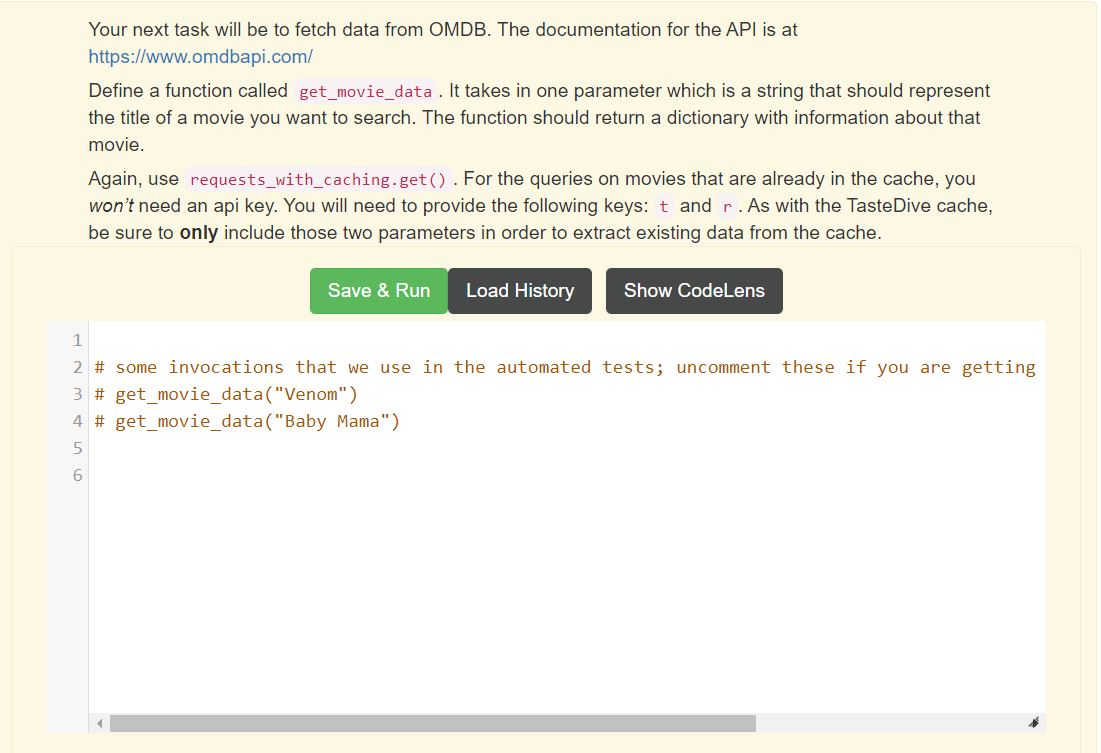

In [7]:
Image('pro5.JPG',width=1000)

In [0]:
import requests_with_caching
import json


def get_movie_data(title):
    base_url = 'http://www.omdbapi.com/'
    params_diction = {}
    params_diction['t'] = title
    params_diction['r'] = 'json'
    this_page_cache = requests_with_caching.get(base_url, params=params_diction)

    return json.loads(this_page_cache.text)

**Part:5**

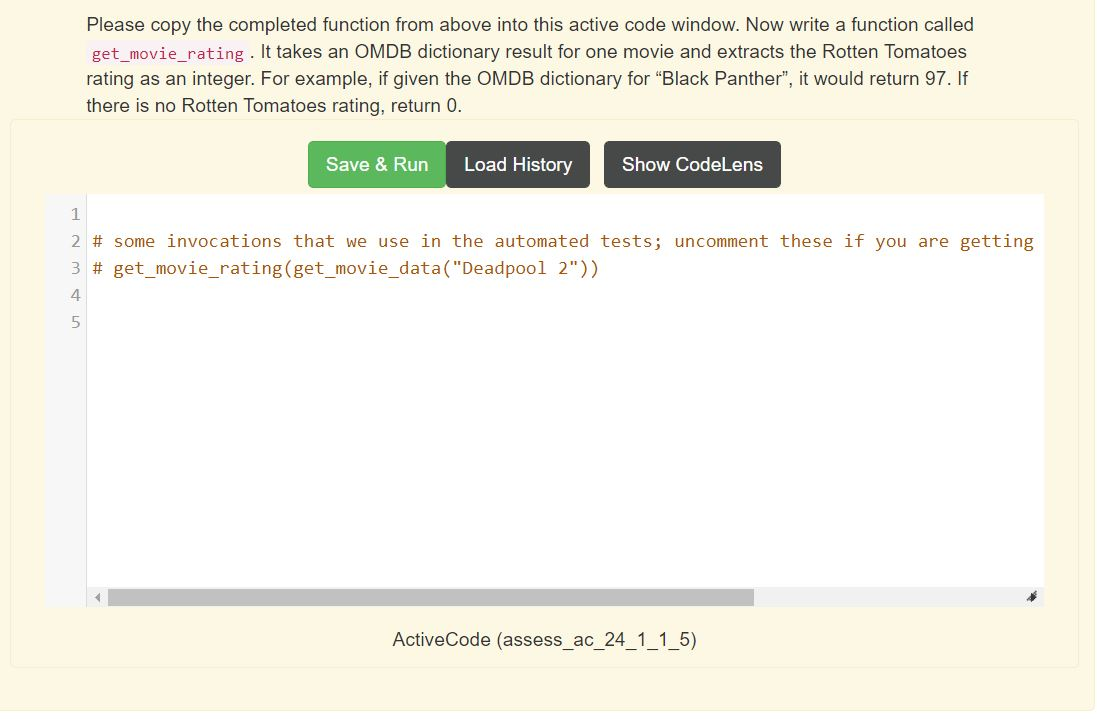

In [8]:
Image('pro6.JPG',width=1000)

In [0]:
import requests_with_caching
import json


def get_movie_data(title):
    base_url = 'http://www.omdbapi.com/'
    params_diction = {}
    params_diction['t'] = title
    params_diction['r'] = 'json'
    this_page_cache = requests_with_caching.get(base_url, params=params_diction)

    return json.loads(this_page_cache.text)

def get_movie_rating(dic):
    rating = dic['Ratings']
    for item in rating:
        if item['Source'] == 'Rotten Tomatoes':
            return int(item['Value'][:-1])
    return 0


Part:6

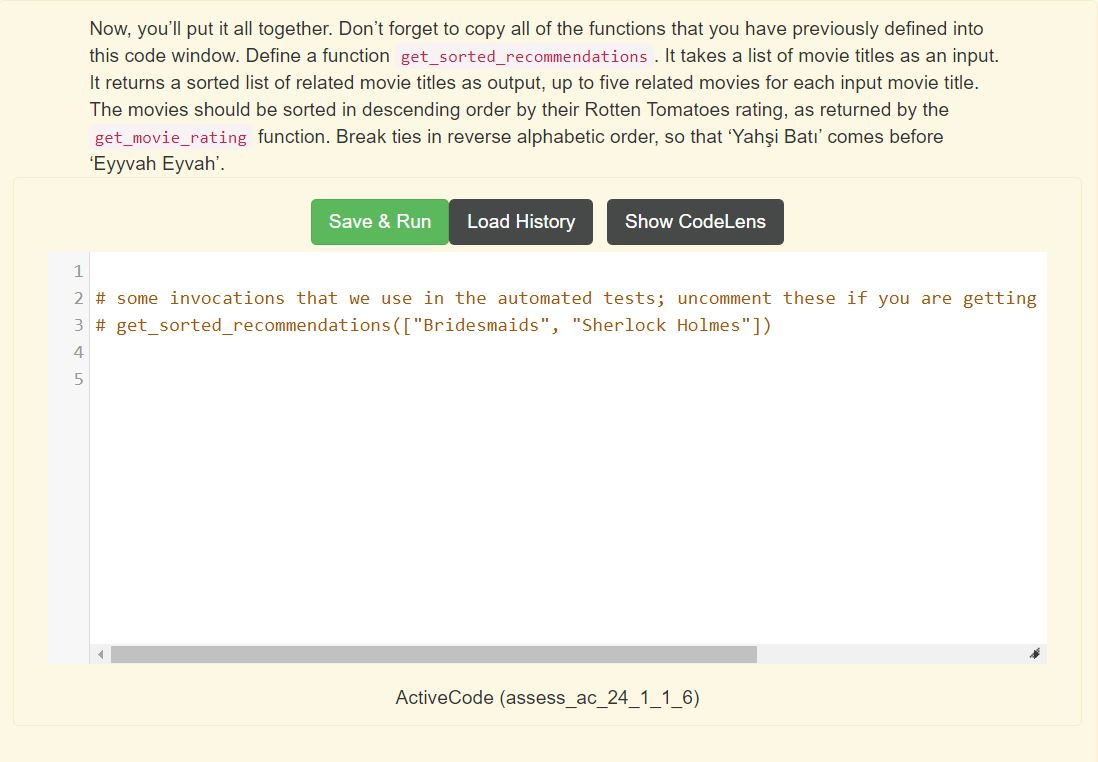

In [9]:
Image('pro7.JPG',width=1000)

In [0]:
import requests_with_caching
import json
def get_movies_from_tastedive(string):
    base_url="https://tastedive.com/api/similar"
    params_diction = {}
    params_diction['q']=string
    params_diction['type']='movies'
    params_diction['limit']=5
    tastedive_response = requests_with_caching.get(base_url, params = params_diction)
    #print(tastedive_response.url)
    return tastedive_response.json()

def extract_movie_titles(result):
    dic=result['Similar']
    l=len(dic['Results'])
    li=[]
    for i in range(5):
        li.append(dic['Results'][i]['Name'])
    return li

def get_related_titles(movie_lis):
    li=[]
    for movie in movie_lis:
        li.extend(extract_movie_titles(get_movies_from_tastedive(movie)))
    return list(set(li))

def get_movie_data(title):
    base_url = 'http://www.omdbapi.com/'
    params_diction = {}
    params_diction['t'] = title
    params_diction['r'] = 'json'
    this_page_cache = requests_with_caching.get(base_url, params=params_diction)

    return json.loads(this_page_cache.text)

def get_movie_rating(dic):
    rating = dic['Ratings']
    for item in rating:
        if item['Source'] == 'Rotten Tomatoes':
            return int(item['Value'][:-1])
    return 0
   

def get_sorted_recommendations(listt):
    n_list = get_related_titles(listt)
    n_dict = {}
    for i in n_list:
        rating = get_movie_rating(get_movie_data(i))
        n_dict[i] = rating
    print(n_dict)
    print(sorted(n_dict, reverse=True))
    return [i[0] for i in sorted(n_dict.items(), key=lambda item: (item[1], item[0]), reverse=True)]

